# BlackFriday
The challenge is to predict purchase prices of various products purchased by customers based on historical purchase patterns. The dataset is comprised of 550,000 observations about Black Friday shoppers in a retail store, it contains different kinds of variables either numerical or categorical. It contains missing values.

## Table of contents
* Introduction
* Hypothesis
* EDA
   * data cleaning
   * data Analysis
* Modeling
   * Feature engineering
* Conclusion

## Introduction
#### Origins:
The origins of "Black Friday" stem not from a day filled with shopping, discounts, and a turn of the holiday season, but rather with a financial crisis! The first recorded use of the term "Black Friday" was recorded on September 24th, 1869 when two Wall Street businessmen, Jay Gould and Jim Fisk, decided to artifically inflate the price of gold and attempted to sell it for profit. As a result of their nefarious actions, on that specific Friday in September 1869, the price of Gold dropped and the United States plunged into a state of financial devestation.


#### First Recorded Use:
Various stories exist regarding the first recorded use of the term as it relates to holiday shopping, but its connotation continued to keep a negetive stigma associated with it until the late 20th century.
"Black Friday" and its relation to consumerism first derived from 1950s Philadelphia. Philadelphia suburbinites descended on the city after the Thanksgiving holiday, to watch the traditional Army/Navy college football game and take advantage of sales and promotions brought about by the influx of spectators to the city. Philidelphia Police Officers who were assigned to work that weekend coined the term due to their long grueling shifts and the mass amounts of people/shoppers. Philidelphia businesses also started to use the term to describe the long lines and shopping mayhem at their stores.


#### Use Within Business:
Although the term "Black Friday" originally represented the pitfalls of two Wall Street businessmen and the mayhem of downtown Philadephia following Thanksgiving, it is now familiarly known today as the busiest shopping day of the year.
One possible explanation/rumor for the term as it relates to consumers and retailers is that "Black Friday" represents the first day of the year in which businesses were turning profits and accounting was done on a hand-written ledger. As described Oxford Dictionary, "The use of colors in accounting refers back to the bookkeeping practice of recording the credit side of an account in a ledger in black ink and the debit side in red ink." (Oxford Dictionaries) Hence the name, "Black Friday" being associated with businesses debits overtaking their credits. Although this idea might make sense, the claim hasn't been completely verified.

#### In Recent Times:

"Black Friday as we know it today is an extravaganza of sales, promotions, and long lines outside of stores. Retailers such as Target, Best Buy, Amazon, and many others look forward to this day every year with the hopes that consumers will take advantage of door-busting deals. The term "Black Friday" has also spawned other retail holidays such as "Cyber Monday", "Small-Business Saturday", and "Giving Tuesday." Here are a few note-worthy statistics from 2018's "Black Friday."

ref: https://bit.ly/2JF4clG

## Hypothesis
#### City Level 
* City Type and Size : Tier 1 cities have higher sales because if the higher levels of people there.
* Population Density : Highly populated cities have higher sales
* Population Age : cities with a young generation buy more

#### Customer Level Hypotheses
* Income: People with higher income should spend more on products.
* Age and Gender: Men with ages ranging from 25 to 40 should spend more on techlogical products.
* Family Size: Families should be more contained on spendings, just buying the best offers and only needed products.
* Purchase History: Customer with a purchase history should be more willing to purchase more products on this day.

#### Store level Hypotheses
* Location: Stores with a location in well moved streets should have better sales.
* Size: Bigger stores with higher stores and variety of products should have better sales.

#### Product Level Hypotheses:
* Category: Most clients should be looking to buy technological products;
* Price: Customer will spend more on products with higher discounts

## EDA

In [60]:
import operator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [61]:
df = pd.read_csv("BlackFriday.csv")

In [62]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [63]:
df.shape

(537577, 12)

In [64]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577,537577,537577,537577.00000,537577,537577,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
unique,NaN,3623,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1858,405380,214690,NaN,226493,189192,NaN,NaN,NaN,NaN,NaN
mean,1.002992e+06,NaN,NaN,NaN,8.08271,NaN,NaN,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,NaN,NaN,NaN,6.52412,NaN,NaN,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,NaN,NaN,NaN,0.00000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,NaN,NaN,NaN,2.00000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,NaN,NaN,NaN,7.00000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,NaN,NaN,NaN,14.00000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12073.000000


In [65]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [67]:
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               18
Product_Category_3               16
Purchase                      17959
dtype: int64

The data consists fo 537577 entries with 12 columns, each representing a corresponding variable below.
* User_ID: Unique identifier of shopper.
* Product_ID: Unique identifier of product. (No key given)
* Gender: Sex of shopper.
* Age: Age of shopper split into bins.
* Occupation: Occupation of shopper. (No key given)
* City_Category: Residence location of shopper. (No key given)
* Stay_In_Current_City_Years: Number of years stay in current city.
* Marital_Status: Marital status of shopper.
* Product_Category_1: Product category of purchase.
* Product_Category_2: Product may belong to other category.
* Product_Category_3: Product may belong to other category.
* Purchase: Purchase amount in dollars.


In [68]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

The null values present are for `Product_Category_2` and `Product_Category_3` .
#### filling missing values.

In [69]:
df["Product_Category_2"] = df["Product_Category_2"].fillna(0)

In [70]:
df["Product_Category_3"] = df["Product_Category_3"].fillna(0)

In [71]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

### Analysis against the target.
The target in our case is the Purchase.

Text(0.5, 1.0, 'Purchase amount Distribution')

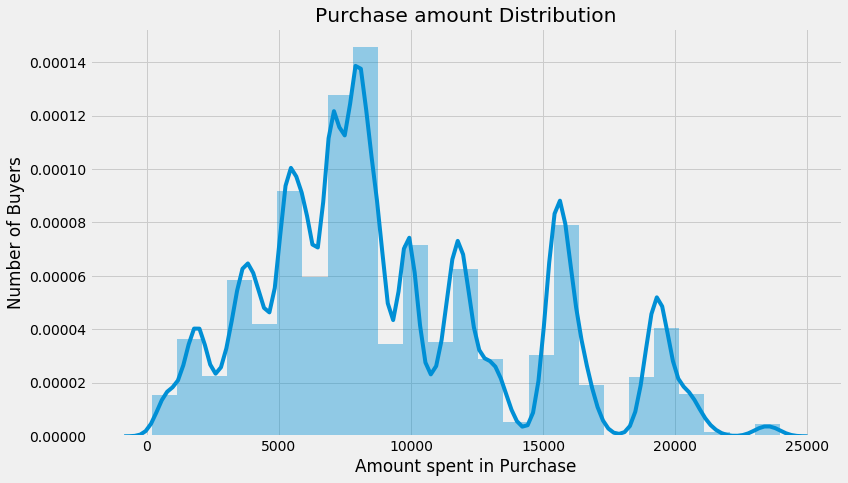

In [72]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(df.Purchase, bins = 25)
plt.xlabel("Amount spent in Purchase")
plt.ylabel("Number of Buyers")
plt.title("Purchase amount Distribution")

target variable has an almost Gaussian distribution.

In [73]:
print ("Skew is:", df.Purchase.skew())
print("Kurtosis: %f" % df.Purchase.kurt())

Skew is: 0.6242797316083074
Kurtosis: -0.343121


In [74]:
def hypo_plot(col):
    sns.countplot(df[col])
    print('Value counts of {} \n {}' .format(col,df[col].value_counts().sort_values(ascending=False)))
    cplot_pivot = df.pivot_table(index=col, values="Purchase", aggfunc=np.mean)
    cplot_pivot.plot(kind='bar', color='blue',figsize=(12,10))
    plt.xlabel(col)
    plt.ylabel("Purchase")
    plt.title(col + " and Purchase Analysis")
    plt.xticks(rotation=0)
    
    plt.show()
    print('\n {}' .format(df.groupby(df[col]).mean()['Purchase'].sort_values(ascending=False)))
    
    print("\n")

#### City_Category

Value counts of City_Category 
 B    226493
C    166446
A    144638
Name: City_Category, dtype: int64


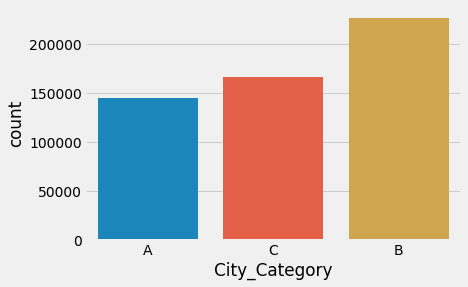

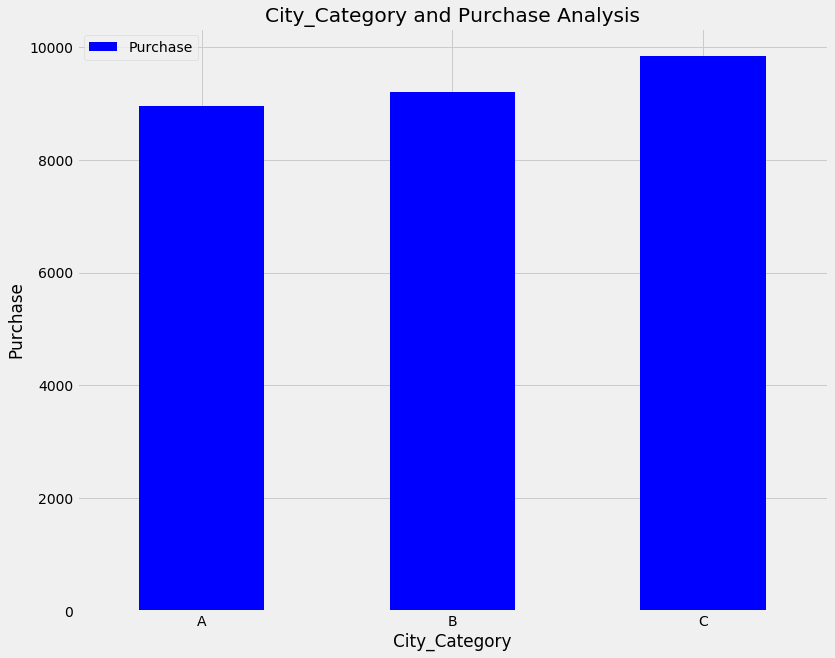


 City_Category
C    9844.441855
B    9198.657848
A    8958.011014
Name: Purchase, dtype: float64




In [75]:
hypo_plot("City_Category")

City_Category B has more people but City_Category C has more purchases. This shows that having a large population doesn't gaurantee high sales.

#### Age

Value counts of Age 
 26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64


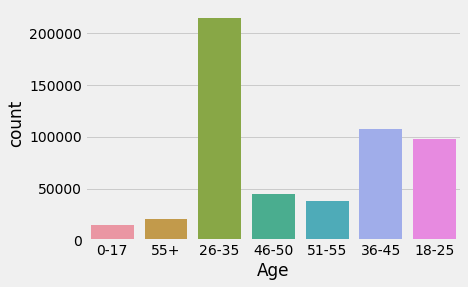

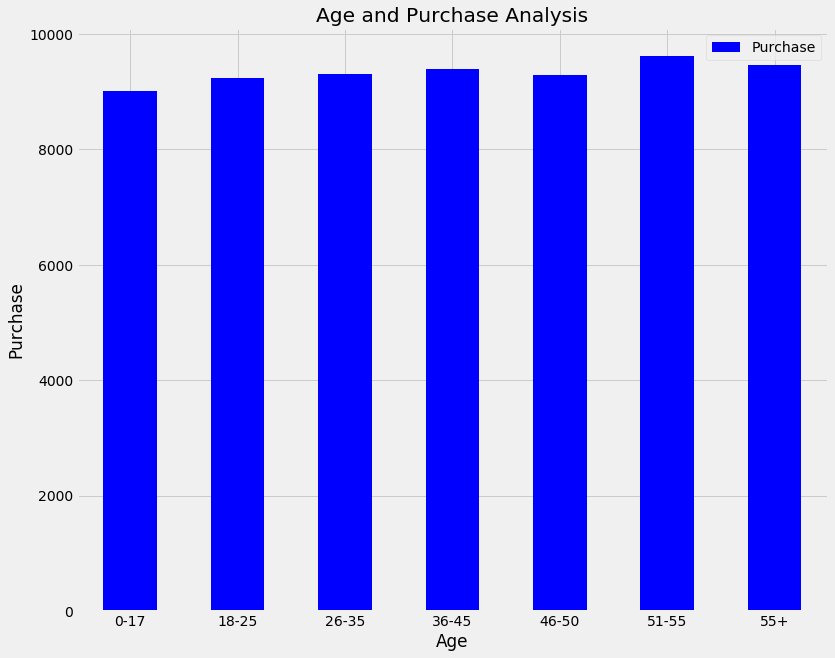


 Age
51-55    9620.616620
55+      9453.898579
36-45    9401.478758
26-35    9314.588970
46-50    9284.872277
18-25    9235.197575
0-17     9020.126878
Name: Purchase, dtype: float64




In [76]:
hypo_plot("Age")

There are more 26-35 year old than any other group but 51-55 spend more.

#### Occupation.

Value counts of Occupation 
 4     70862
0     68120
7     57806
1     45971
17    39090
20    32910
12    30423
14    26712
2     25845
16    24790
6     19822
3     17366
10    12623
5     11985
15    11812
11    11338
19     8352
13     7548
18     6525
9      6153
8      1524
Name: Occupation, dtype: int64


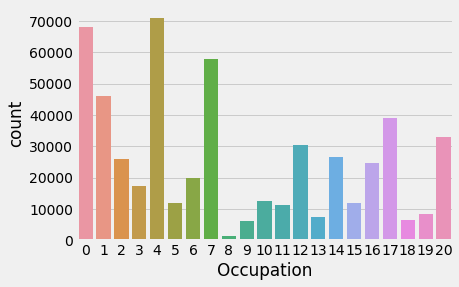

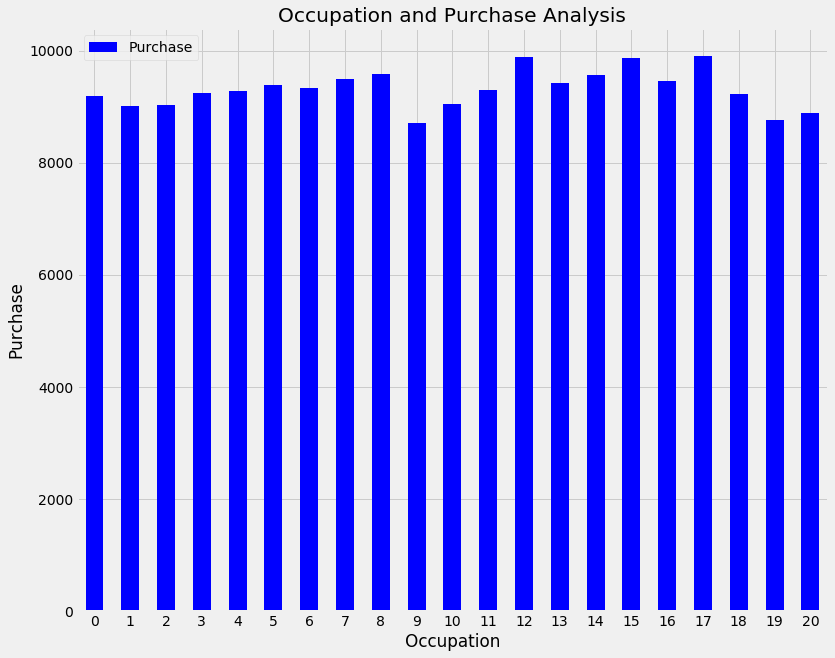


 Occupation
17    9906.378997
12    9883.052460
15    9866.239925
8     9576.508530
14    9568.536426
7     9502.175276
16    9457.133118
13    9424.449391
5     9388.848978
6     9336.378620
11    9299.467190
4     9279.026742
3     9238.077277
18    9233.671418
0     9186.946726
10    9052.836410
2     9025.938982
1     9017.703095
20    8881.099514
19    8754.249162
9     8714.335934
Name: Purchase, dtype: float64




In [77]:
hypo_plot("Occupation")

Occupation 4 has the largest number of people but people with occupation 17 spend more in purchases.
Currently there is no way of telling what each of the Occupations rep.

#### Gender

Value counts of Gender 
 M    405380
F    132197
Name: Gender, dtype: int64


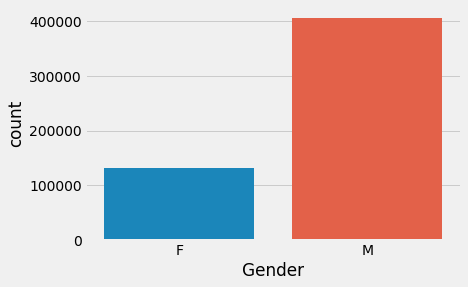

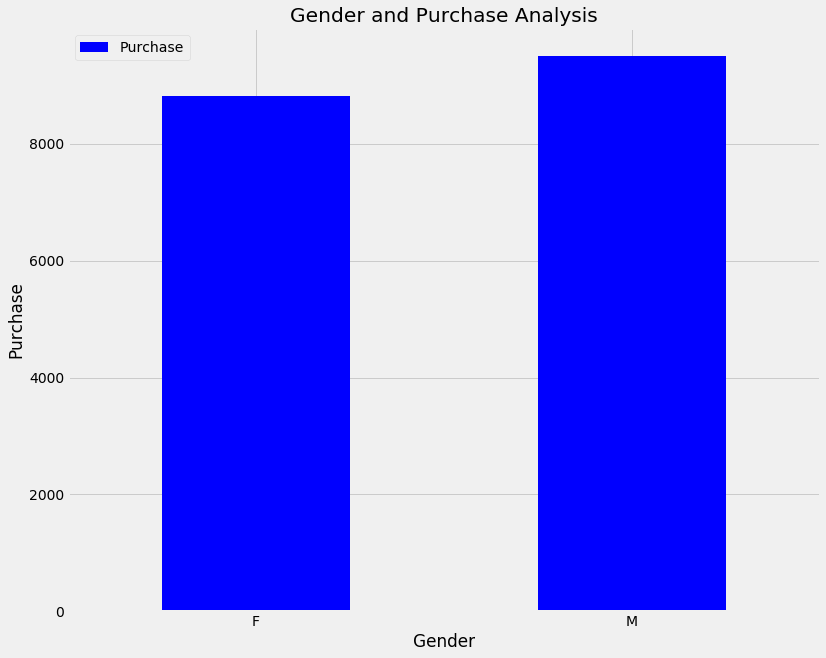


 Gender
M    9504.771713
F    8809.761349
Name: Purchase, dtype: float64




In [78]:
hypo_plot("Gender")

There are more Male than Female , the males spend more than the females.

#### Age Gender

In [79]:
age_list = df["Age"].unique()

In [80]:
age_list = np.sort(age_list)

In [81]:
def age_gender(gen):
    
    age_purchase = {}
    for age in age_list:
        avg_age = df[df["Age"] == age][df["Gender"]==gen]["Purchase"].mean()
        age_purchase[age] = avg_age
    age_purchase = sorted(age_purchase.items(), key=operator.itemgetter(1), reverse=True)
    return age_purchase

In [82]:
print("Age-group average purchase male gender\n")
age_gender('M')

Age-group average purchase male gender



[('51-55', 9789.020475986277),
 ('55+', 9557.058094403406),
 ('36-45', 9517.126321242245),
 ('18-25', 9506.5010805007),
 ('26-35', 9470.621052122267),
 ('46-50', 9429.15156299337),
 ('0-17', 9312.322226778757)]

Males between 51-55 buy more.

In [83]:
print("Age-group average purchase female gender\n")
age_gender('F')

Age-group average purchase female gender



[('51-55', 9131.451837243098),
 ('55+', 9119.577196185839),
 ('36-45', 9046.573807721423),
 ('46-50', 8929.44873988799),
 ('26-35', 8791.798654454082),
 ('0-17', 8444.70321017565),
 ('18-25', 8405.430851727147)]

Females between 51-55 buy more.

#### Family Size 
Here we are looking if the buyers are married or not we can't determine if they have kids.

Value counts of Marital_Status 
 0    317817
1    219760
Name: Marital_Status, dtype: int64


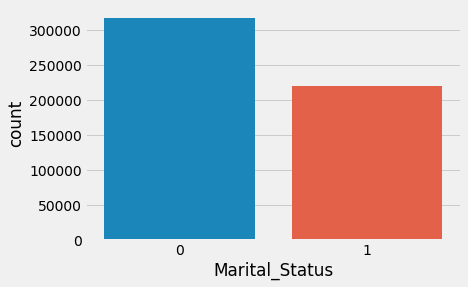

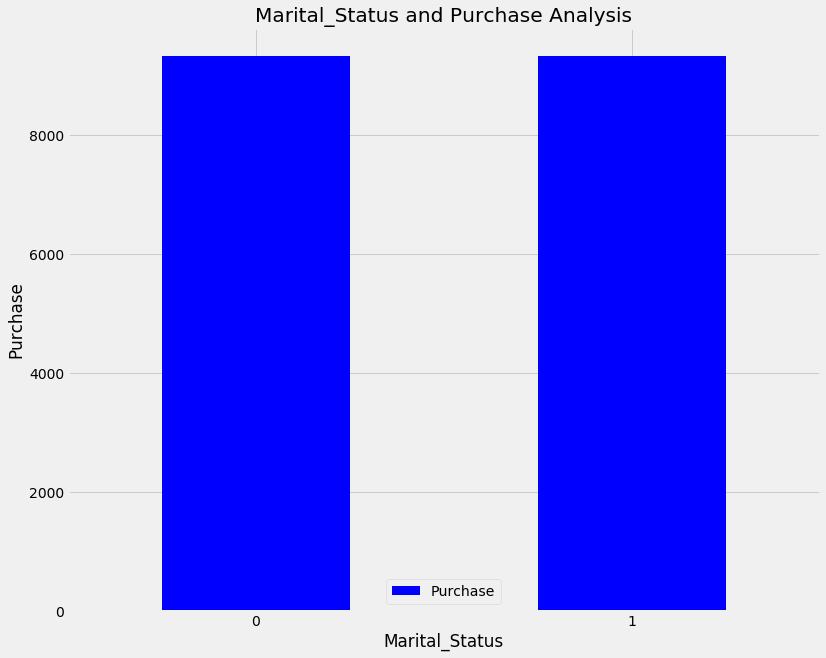


 Marital_Status
1    9334.632681
0    9333.325467
Name: Purchase, dtype: float64




In [84]:
hypo_plot("Marital_Status")

There are more single people than married but their amount of purchases are similar.
#### Repeat customers.

In [85]:
repeat_customersdf = df.groupby('User_ID').sum().sort_values("Purchase", ascending=False)

In [86]:
repeat_customersdf['repeatbuy'] = df.groupby('User_ID').size()

In [87]:
repeat_customersdf = repeat_customersdf.drop(["Occupation", "Marital_Status", "Product_Category_1",
                         "Product_Category_2", "Product_Category_3"], axis=1)

Text(0.5, 1.0, 'Purchase amount Distribution')

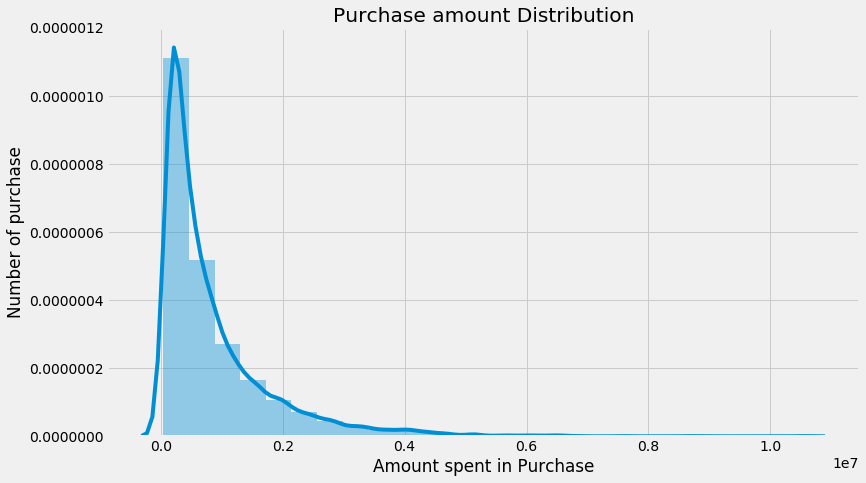

In [88]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(repeat_customersdf.Purchase, bins = 25)
plt.xlabel("Amount spent in Purchase")
plt.ylabel("Number of purchase")
plt.title("Purchase amount Distribution")

Those buying more goods have fewer purchases.

In [89]:
#plt.scatter(repeat_customersdf["repeatbuy"], repeat_customersdf["Purchase"], alpha=0.5)

#### Category

Value counts of Product_Category_1 
 5     148592
1     138353
8     112132
11     23960
2      23499
6      20164
3      19849
4      11567
16      9697
15      6203
13      5440
10      5032
12      3875
7       3668
18      3075
14      1500
17       567
9        404
Name: Product_Category_1, dtype: int64


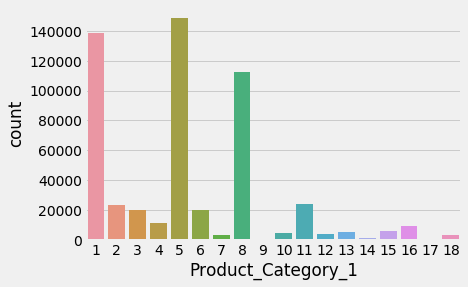

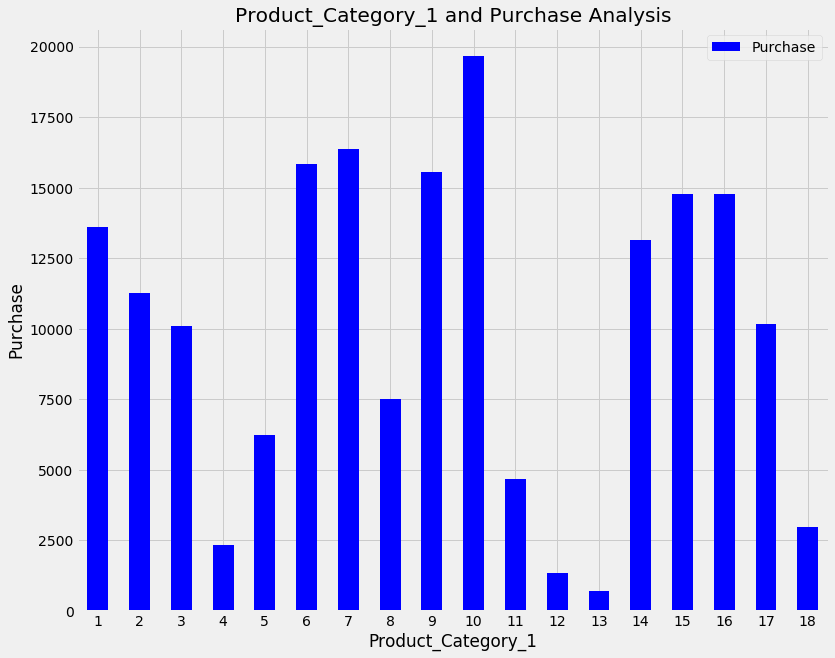


 Product_Category_1
10    19679.974364
7     16373.830153
6     15837.893573
9     15538.297030
15    14776.422215
16    14764.157471
1     13607.701495
14    13145.452000
2     11255.680752
17    10156.440917
3     10096.841705
8      7497.354850
5      6238.004045
11     4682.933556
18     2975.307642
4      2328.862886
12     1351.195613
13      722.619485
Name: Purchase, dtype: float64




In [90]:
hypo_plot("Product_Category_1")

Value counts of Product_Category_2 
 0.0     166986
8.0      63058
14.0     54158
2.0      48481
16.0     42602
15.0     37317
5.0      25874
4.0      25225
6.0      16251
11.0     13945
17.0     13130
13.0     10369
9.0       5591
12.0      5419
10.0      2991
3.0       2835
18.0      2730
7.0        615
Name: Product_Category_2, dtype: int64


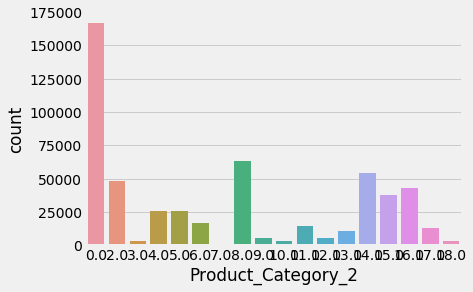

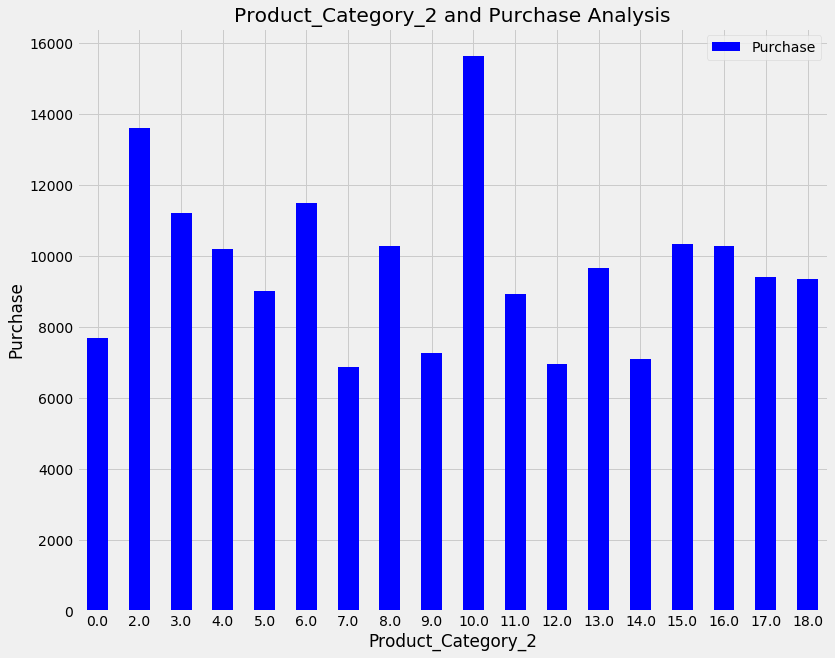


 Product_Category_2
10.0    15656.014711
2.0     13621.740682
6.0     11500.585872
3.0     11229.532628
15.0    10358.723290
16.0    10298.676025
8.0     10278.036363
4.0     10218.319009
13.0     9672.264346
17.0     9416.534196
18.0     9370.698168
5.0      9034.054649
11.0     8935.682467
0.0      7695.854347
9.0      7282.593633
14.0     7106.356752
12.0     6968.662299
7.0      6877.234146
Name: Purchase, dtype: float64




In [91]:
hypo_plot("Product_Category_2")

Value counts of Product_Category_3 
 0.0     373299
16.0     32148
15.0     27611
14.0     18121
17.0     16449
5.0      16380
8.0      12384
9.0      11414
12.0      9094
13.0      5385
6.0       4818
18.0      4563
4.0       1840
11.0      1773
10.0      1698
3.0        600
Name: Product_Category_3, dtype: int64


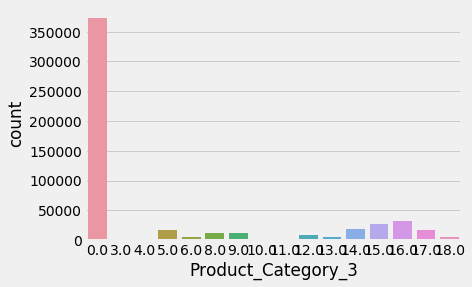

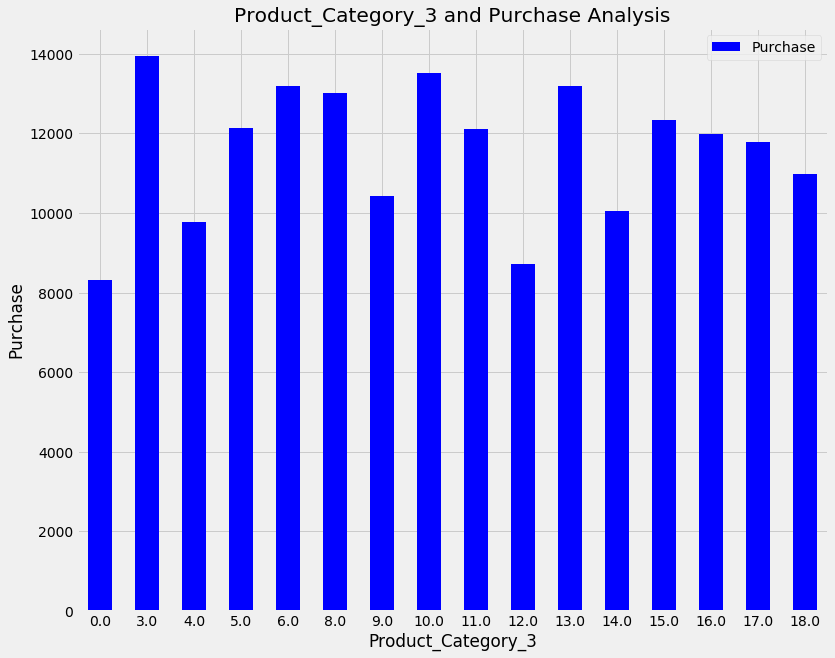


 Product_Category_3
3.0     13957.166667
10.0    13522.985866
6.0     13189.812785
13.0    13183.002228
8.0     13029.554102
15.0    12338.232770
5.0     12128.351770
11.0    12112.626622
16.0    11982.500093
17.0    11779.470059
18.0    10983.583169
9.0     10429.594533
14.0    10053.965179
4.0      9778.290761
12.0     8718.752144
0.0      8309.752619
Name: Purchase, dtype: float64




In [92]:
hypo_plot("Product_Category_3")

## Modeling
We'll be using Randomforest and the fastai library.

In [93]:
from fastai.imports import *
from fastai.structured import *
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [94]:
df_raw = df

In [95]:
df_raw["Purchase"] = np.log(df_raw["Purchase"])

### Pre-processing

In [96]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 49.2+ MB


convert into categorical

In [97]:
train_cats(df_raw)

We'll replace categories with their numeric codes, handle missing continuous values, and split the dependent variable into a separate variable.

In [98]:
df, y, nas = proc_df(df_raw, 'Purchase')

In [99]:
def split_vals(a,n): 
    return a[:n].copy(), a[n:].copy()



In [100]:
n_valid = 20000  
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((517577, 11), (517577,), (20000, 11))

In [101]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [44]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 57.4 s, sys: 546 ms, total: 57.9 s
Wall time: 17.5 s
[1198.2487058182046, 2876.558229547596, 0.9421045237075283, 0.670102623241419]


In a good model, the RMSE should be close for both your testing data and your training data. If the RMSE for your testing data is higher than the training data, there is a high chance that your model overfit. In other words, your model performed worse during testing than training. In our case we are overfitting.

In [45]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[1104.2114973682949, 2829.2422697068996, 0.9508350928206308, 0.6808662036570212]


To speed up the process of modeling I'll be using a subset

In [102]:
df_trn, y_trn, nas = proc_df(df_raw, 'Purchase', subset=100000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [103]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.15061273326445823, 0.37705373903917766, 0.9453478260793545, 0.6598256169596615]


In [104]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.14348079730248658, 0.37146903236820533, 0.950401148023132, 0.6698279310123989]


In [52]:
m = RandomForestRegressor(n_estimators=50, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[1093.047620312281, 2925.7873380682063, 0.951314531110444, 0.6587143446110324]


With increase in number of estimators we are still over fitting.

In [48]:
?? train_cats()

In [49]:
?? proc_df()